In [3]:
import numpy as np
import math
from scipy import stats
from matplotlib import pyplot as plt

In [8]:
K = 3

pi = np.array([0.3, 0.5, 0.2])
k_line = np.arange(1, K + 1)
s_oh = np.identity(K)

print(pi)
print(k_line)
print(s_oh)

[0.3 0.5 0.2]
[1 2 3]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


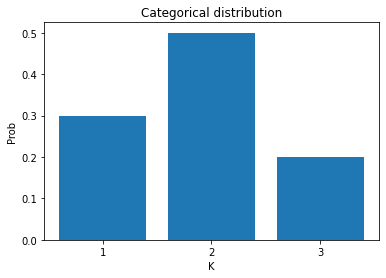

In [25]:
plt.bar(x=k_line, height=pi)

plt.title("Categorical distribution")
plt.xlabel("K")
plt.ylabel("Prob")
plt.xticks(ticks=k_line, labels=k_line)
plt.show()

In [10]:
cond_prob_pi_s = np.prod(
    pi ** s_oh,
    axis=1,
)
cond_prob_pi_s

array([0.3, 0.5, 0.2])

In [21]:
size = 50
s_n = np.random.multinomial(
    n=1, 
    pvals=pi, 
    size=size,
)

print(s_n[:5])
print(np.sum(s_n, axis=0))

[[1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]]
[18 23  9]


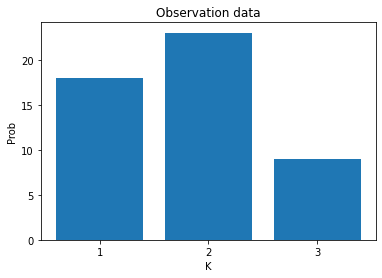

In [26]:
plt.bar(x=k_line, height=np.sum(s_n, axis=0))

plt.title("Observation data")
plt.xlabel("K")
plt.ylabel("Prob")
plt.xticks(ticks=k_line, labels=k_line)
plt.show()

In [31]:
alpha_k = np.array([1.0, 1.0, 1.0])

point_vec = np.arange(0.0, 1.001, 0.02)
X, Y, Z = np.meshgrid(point_vec, point_vec, point_vec)
pi_point = np.array([
    list(X.flatten()), 
    list(Y.flatten()), 
    list(Z.flatten())]).T
pi_point = pi_point[1:, :]
pi_point /= np.sum(pi_point, axis=1, keepdims=True)
pi_point = np.unique(pi_point, axis=0)

In [40]:
tmp_vec = np.array([1, 2])
tmp_X, tmp_Y, tmp_Z = np.meshgrid(tmp_vec, tmp_vec, tmp_vec)
np.array([
    list(tmp_X.flatten()), 
    list(tmp_Y.flatten()), 
    list(tmp_Z.flatten()),
]).T

array([[1, 1, 1],
       [1, 1, 2],
       [2, 1, 1],
       [2, 1, 2],
       [1, 2, 1],
       [1, 2, 2],
       [2, 2, 1],
       [2, 2, 2]])

In [47]:
normalizer = math.lgamma(np.sum(alpha_k)) - np.sum([math.lgamma(a) for a in alpha_k])
prior = np.exp(normalizer) * np.prod(pi_point ** (alpha_k - 1), axis=1)
prior

array([2., 2., 2., ..., 2., 2., 2.])

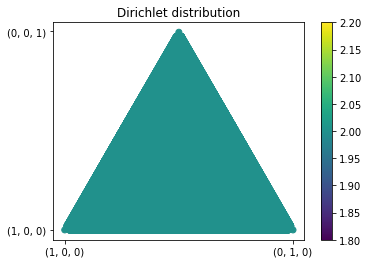

In [48]:
tri_x = pi_point[:, 1] + pi_point[:, 2] / 2
tri_y = np.sqrt(3) * pi_point[:, 2] / 2
plt.scatter(tri_x, tri_y, c=prior) 

plt.title("Dirichlet distribution")
plt.xticks(ticks=[0.0, 1.0], labels=['(1, 0, 0)', '(0, 1, 0)'])
plt.yticks(ticks=[0.0, 0.87], labels=['(1, 0, 0)', '(0, 0, 1)']) 
plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()

In [49]:
alpha_hat_k = np.sum(s_n, axis=0) + alpha_k
alpha_hat_k

array([19., 24., 10.])

In [50]:
normalizer = math.lgamma(np.sum(alpha_hat_k)) - np.sum([math.lgamma(a) for a in alpha_hat_k])
posterior = np.exp(normalizer) * np.prod(pi_point ** (alpha_hat_k - 1), axis=1)
posterior

array([0., 0., 0., ..., 0., 0., 0.])

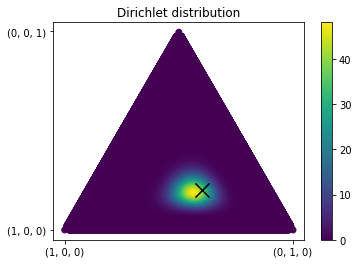

In [52]:
tri_x_truth = pi[1] + pi[2] / 2
tri_y_truth = np.sqrt(3) * pi[2] / 2
plt.scatter(tri_x, tri_y, c=posterior) 

plt.title("Dirichlet distribution")
plt.xticks(ticks=[0.0, 1.0], labels=['(1, 0, 0)', '(0, 1, 0)'])
plt.yticks(ticks=[0.0, 0.87], labels=['(1, 0, 0)', '(0, 0, 1)']) 
plt.colorbar()
plt.gca().set_aspect('equal')
plt.scatter(tri_x_truth, tri_y_truth, marker='x', color='black', s=200)
plt.show()

In [53]:
pi_hat_star_k = alpha_hat_k / np.sum(alpha_hat_k)
pi_hat_star_k = (np.sum(s_n, axis=0) + alpha_k) / np.sum(np.sum(s_n, axis=0) + alpha_k)
pi_hat_star_k

array([0.35849057, 0.45283019, 0.18867925])

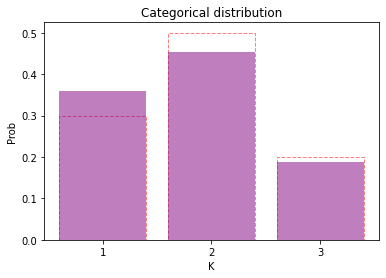

In [54]:
plt.bar(
    x=k_line, 
    height=pi, 
    label='truth',
    alpha=0.5, 
    color='white', 
    edgecolor='red', 
    linestyle='dashed',
)
plt.bar(
    x=k_line, 
    height=pi_hat_star_k, 
    label='predict', 
    alpha=0.5, 
    color='purple',
)

plt.title("Categorical distribution")
plt.xlabel("K")
plt.ylabel("Prob")
plt.xticks(ticks=k_line, labels=k_line)
plt.show()